# Declaration of Originality

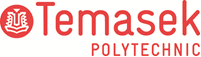

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ong Xuan (2404506D)
* Tutorial Group                :  PC05
* Tutor						    :  Kian Eng Ong
* Submission Date               :  11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, RocCurveDisplay
)

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif


# 1. Business Understanding
Goal: To develop a machine learning model that predicts whether an individual
is at risk of diabetes using health and behavioural indicators, in order to
support early screening and preventive intervention.


## Business Understanding

Diabetes is a chronic disease that can lead to serious health complications
such as heart disease, kidney failure, and vision loss if not identified and
managed early. A large proportion of individuals with diabetes or prediabetes
remain unaware of their condition, delaying preventive intervention.

The objective of this project is to develop a machine learning model that can
predict whether an individual is at risk of diabetes based on health and
behavioural indicators. This model is intended to support early screening
and risk identification rather than provide a medical diagnosis.

Such a predictive tool can assist public health agencies, healthcare providers,
and community screening programmes by prioritising individuals who may benefit
from further medical assessment or lifestyle intervention.


# 2. Data Understanding

## Data Understanding

The dataset used in this project is derived from the Behavioral Risk Factor
Surveillance System (BRFSS) 2015 survey conducted by the Centers for Disease
Control and Prevention (CDC). The survey collects self-reported health and
behavioural data from adults across the United States.

This project uses the `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`
dataset, which contains 70,692 records and 21 feature variables. The target
variable, `Diabetes_binary`, is a binary indicator where:
- 0 represents individuals without diabetes
- 1 represents individuals with prediabetes or diabetes

The dataset is balanced with an equal proportion of both classes, making it
suitable for supervised binary classification. Most features are binary or
ordinal health indicators, with a small number of continuous variables such
as BMI.

Exploratory data analysis revealed no missing values in the dataset. Outlier
analysis identified extreme but plausible BMI values, which were retained to
preserve real-world variability. Overall, the dataset is appropriate for
training and evaluating machine learning models for diabetes risk prediction.


## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
DATA_PATH = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(DATA_PATH)



## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
## Check for missing data
df.isna().sum()
df.isna().mean() * 100

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [5]:
## Describe data distribution
df.describe()
df.groupby("Diabetes_binary").mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,0.374243,0.381288,0.957336,27.769960,0.432326,0.031885,0.072738,0.775533,0.638149,0.821140,...,0.950150,0.081961,2.383183,3.042268,3.666355,0.134244,0.434872,7.789057,5.096390,6.186527
1.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


The dataset consists entirely of numerical variables, including binary and
ordinal health indicators. No missing values were detected across the dataset,
therefore no data imputation was required.

Descriptive statistics show variation across features such as BMI, physical
health, and mental health. Grouped summary statistics indicate that individuals
at risk of diabetes generally exhibit higher average BMI and poorer health
indicators, supporting the relevance of these features for prediction.


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

Data visualisation was performed to understand the distribution of the target
variable, feature distributions, and relationships between variables.

The target variable shows a balanced distribution between individuals with and
without diabetes risk. Feature distribution analysis indicates that variables
such as BMI are right-skewed and exhibit higher values among individuals at risk
of diabetes. Correlation analysis reveals generally low to moderate correlations
between features, suggesting limited multicollinearity and supporting the use of
tree-based models.

### 2.3.1.1 Understanding distribution of target

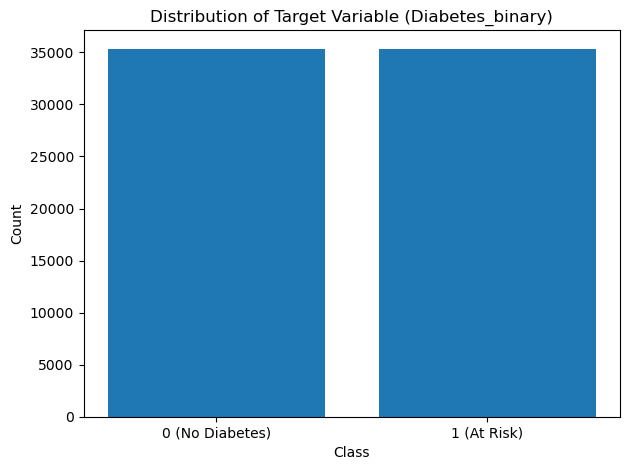

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [6]:
## Understanding distribution of target
# Distribution of target variable
plt.figure()
counts = df["Diabetes_binary"].value_counts().sort_index()
plt.bar(["0 (No Diabetes)", "1 (At Risk)"], counts.values)
plt.title("Distribution of Target Variable (Diabetes_binary)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(df["Diabetes_binary"].value_counts())
print(df["Diabetes_binary"].value_counts(normalize=True))


### Target Variable Distribution

The distribution of the target variable (Diabetes_binary) was analysed to
understand the class balance in the dataset.

A bar chart was used to visualise the number of individuals with and without
diabetes risk. In addition, absolute counts and class proportions were printed
to quantify the class distribution.

This analysis helps to identify whether the dataset is imbalanced, which may
affect model performance and evaluation. Since both classes are reasonably
balanced in this dataset, standard classification models and evaluation
metrics can be applied without requiring additional resampling techniques.


### 2.3.1.2 Understanding distribution of features

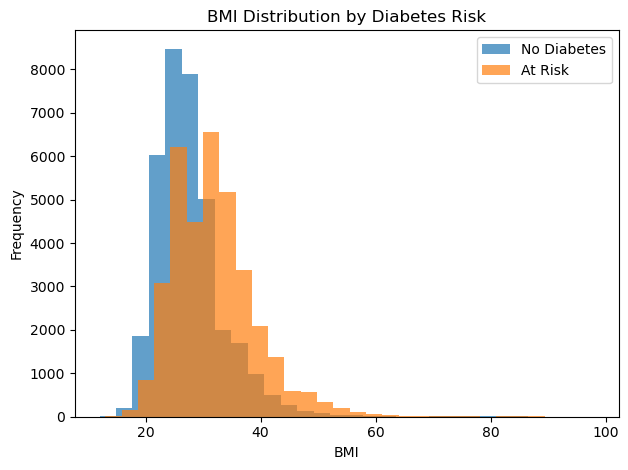

BMI descriptive statistics:
count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

Top 10 highest BMI values:


,BMI,Diabetes_binary
46214,98.0,1.0
612,98.0,0.0
45849,98.0,1.0
45850,98.0,1.0
27801,95.0,0.0
46211,95.0,1.0
18303,95.0,0.0
21467,95.0,0.0
17943,92.0,0.0
46194,92.0,1.0


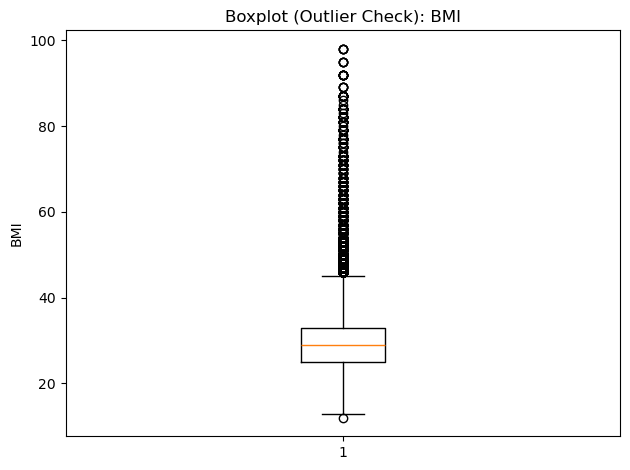

BMI: IQR outlier count = 2181 (kept because values can be realistic in health data)


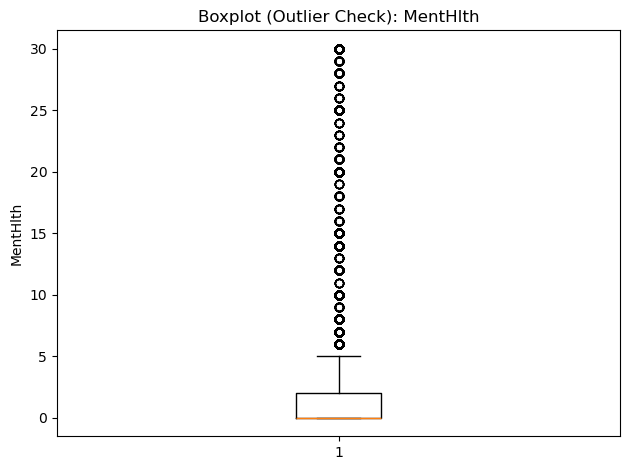

MentHlth: IQR outlier count = 11816 (kept because values can be realistic in health data)


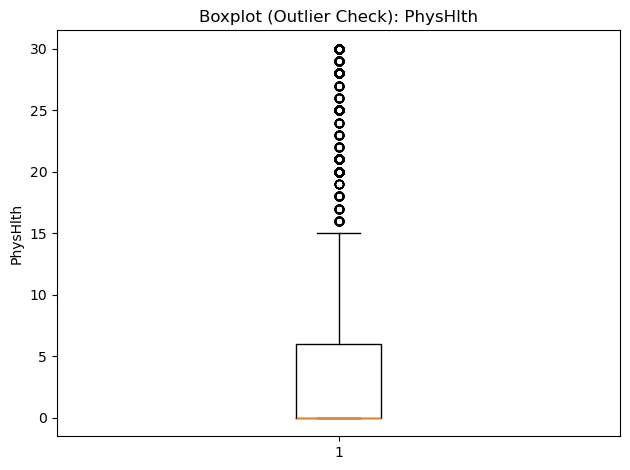

PhysHlth: IQR outlier count = 10624 (kept because values can be realistic in health data)


In [7]:
## Understanding distribution of features
# BMI distribution by diabetes outcome
plt.figure()
plt.hist(df[df["Diabetes_binary"] == 0]["BMI"], bins=30, alpha=0.7, label="No Diabetes")
plt.hist(df[df["Diabetes_binary"] == 1]["BMI"], bins=30, alpha=0.7, label="At Risk")
plt.title("BMI Distribution by Diabetes Risk")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print("BMI descriptive statistics:")
print(df["BMI"].describe())

print("\nTop 10 highest BMI values:")
display(df.sort_values(by="BMI", ascending=False).head(10)[["BMI", "Diabetes_binary"]])


possible_continuous = [c for c in ["BMI", "MentHlth", "PhysHlth"] if c in df.columns]

for col in possible_continuous:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot (Outlier Check): {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # Optional: IQR count (not removing, just reporting)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: IQR outlier count = {outlier_count} (kept because values can be realistic in health data)")



### Feature Distribution and Outlier Analysis

The distributions of key continuous features, including BMI, MentHlth, and
PhysHlth, were analysed using histograms, descriptive statistics, and boxplots.

BMI distributions were compared between individuals with and without diabetes
to identify potential differences in health patterns. Summary statistics were
also examined to understand the central tendency and variability of BMI values.

Boxplots and the Interquartile Range (IQR) method were used to detect potential
outliers. Although some extreme values, particularly for BMI, were observed,
these values were not removed.

Although BMI values close to 100 are extremely rare, such values are still
medically plausible in cases of severe obesity or may arise from self-reported
survey data. Since the dataset originates from a large population-based survey,
these extreme values were retained to preserve real-world variability and avoid
introducing bias through arbitrary removal.


### 2.3.2 Understanding relationship between variables

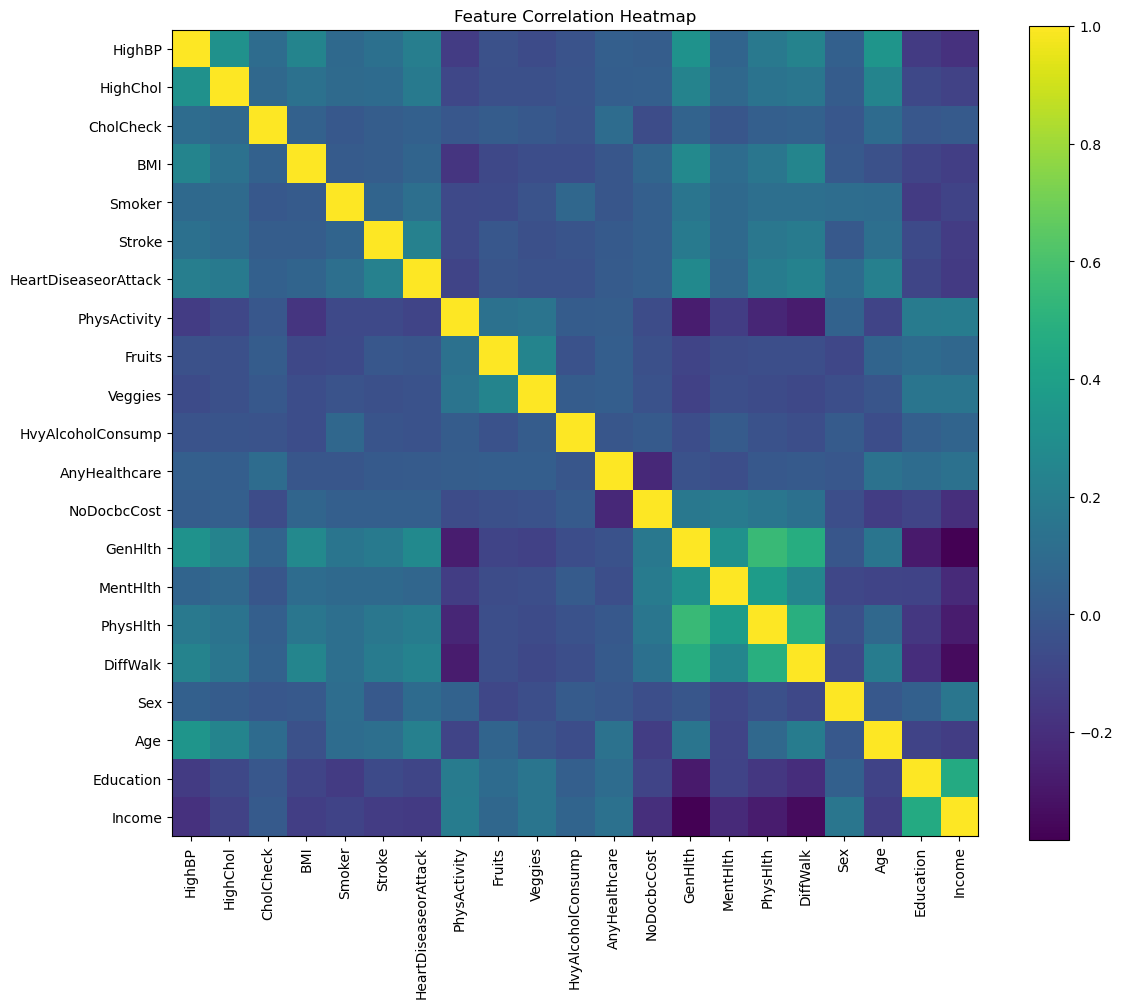

In [8]:
## Understanding relationship between variables
corr = df.drop(columns=["Diabetes_binary"]).corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### Feature Correlation Analysis

A correlation matrix was computed to examine the relationships between
numerical features in the dataset. The target variable (Diabetes_binary)
was excluded to focus on inter-feature relationships.

A heatmap was used to visualise the correlation values, where darker colours
indicate stronger positive or negative correlations.

This analysis helps to identify highly correlated features, which may cause
multicollinearity and negatively affect certain models such as Logistic
Regression. It also provides insights into how health indicators are related
to each other, supporting feature selection and model interpretation.


# 3. Data Preparation

## 3.1 Data Cleaning

In [9]:
## Clean data
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Verify data types
print("\nData types:")
print(df.dtypes)



Missing values per column:
Diabetes_binary    0
HighBP             0
Education          0
Age                0
Sex                0
DiffWalk           0
PhysHlth           0
MentHlth           0
GenHlth            0
NoDocbcCost        0
dtype: int64

Data types:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


### Data Cleaning

The dataset was examined for missing values and data type inconsistencies.
No missing values were detected across the dataset, and all features were
already in numerical format.

Outlier analysis was conducted during exploratory data analysis, particularly
for BMI. Although extreme BMI values were observed, these values are medically
plausible and representative of real-world public health data. Therefore, no
rows were removed during data cleaning.


## 3.2 Train-Test Split

In [10]:
## Split data into train set and test set

TARGET = "Diabetes_binary"

X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

PRIMARY_METRIC = "recall"  # Primary metric: minimize false negatives (missing at-risk people)
print("Primary evaluation metric for this project:", PRIMARY_METRIC)
print("\nModels are ranked by CV Recall because Recall is the PRIMARY metric.")


Training set shape: (56553, 21)
Test set shape: (14139, 21)
Primary evaluation metric for this project: recall

Models are ranked by CV Recall because Recall is the PRIMARY metric.


### Train-Test Split

The dataset was split into training and test sets using an 80:20 ratio.
Stratified sampling was applied to preserve the class distribution of the
target variable in both sets.

The training set was used for model development, cross-validation, and
hyperparameter tuning, while the test set was held out and used only once
for final model evaluation to prevent data leakage and ensure fair
performance assessment.


# 4. Modelling

### 4.2 Train Model

In [11]:
def cv_compare(models, X_train, y_train):
    """Compare models using Stratified K-Fold CV on TRAINING set only."""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc"
    }

    rows = []
    for name, estimator in models.items():
        scores = cross_validate(
            estimator,
            X_train, y_train,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )

        rows.append({
            "Model": name,
            "CV Accuracy": scores["test_accuracy"].mean(),
            "CV Precision": scores["test_precision"].mean(),
            "CV Recall": scores["test_recall"].mean(),
            "CV F1": scores["test_f1"].mean(),
            "CV ROC-AUC": scores["test_roc_auc"].mean()
        })

    return pd.DataFrame(rows).sort_values(by="CV Recall", ascending=False)


def evaluate_on_test(name, estimator, X_train, y_train, X_test, y_test):
    """Fit on full train, evaluate on test, print metrics + plots."""
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)

    # probabilities for ROC curve / AUC (if available)
    if hasattr(estimator, "predict_proba"):
        prob = estimator.predict_proba(X_test)[:, 1]
    else:
        prob = None

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, zero_division=0)
    rec = recall_score(y_test, pred, zero_division=0)
    f1 = f1_score(y_test, pred, zero_division=0)

    print(f"\n=== TEST RESULTS: {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1       : {f1:.4f}")

    if prob is not None:
        auc = roc_auc_score(y_test, prob)
        print(f"ROC-AUC  : {auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, pred, digits=4))

    cm = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

    if prob is not None:
        RocCurveDisplay.from_predictions(y_test, prob)
        plt.title(f"ROC Curve - {name}")
        plt.tight_layout()
        plt.show()

    return {"Model": name, "Test Accuracy": acc, "Test Precision": prec, "Test Recall": rec, "Test F1": f1}

## Initialise and train models
baseline = DummyClassifier(strategy="most_frequent", random_state=42)

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=3000, random_state=42))
])

tree = DecisionTreeClassifier(random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    n_jobs=-1
)

# Feature engineering pipeline
log_reg_fs = Pipeline([
    ("select", SelectKBest(score_func=mutual_info_classif, k=10)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=3000, random_state=42))
])

models = {
    "Baseline Dummy": baseline,
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "Random Forest": rf,
    "LogReg + SelectKBest(k=10)": log_reg_fs
}

print("Models initialised and ready for training.")


Models initialised and ready for training.


cv_compare() compares multiple models fairly using stratified 5-fold cross-validation
on the training set only. It calculates and averages evaluation metrics across
folds and ranks models by mean Recall.

evaluate_on_test() trains the selected model on the full training dataset and
evaluates it once on the unseen test dataset. It outputs test metrics and plots
(confusion matrix and ROC curve) as evidence of generalisation performance.

Multiple models were initialised including a baseline Dummy classifier,
Logistic Regression, Decision Tree, Random Forest, and a feature-selected
Logistic Regression pipeline.


# 5. Model Evaluation

Primary evaluation metric: recall

Cross-Validation Results (sorted by Recall):
                     Model  CV Accuracy  CV Precision  CV Recall    CV F1  CV ROC-AUC
             Random Forest     0.740102      0.721556   0.782013 0.750552    0.811368
       Logistic Regression     0.748342      0.738911   0.768151 0.753233    0.825044
LogReg + SelectKBest(k=10)     0.744806      0.735956   0.763624 0.749519    0.820985
             Decision Tree     0.658462      0.660388   0.652579 0.656421    0.658466
            Baseline Dummy     0.499973      0.299991   0.600000 0.399992    0.500000


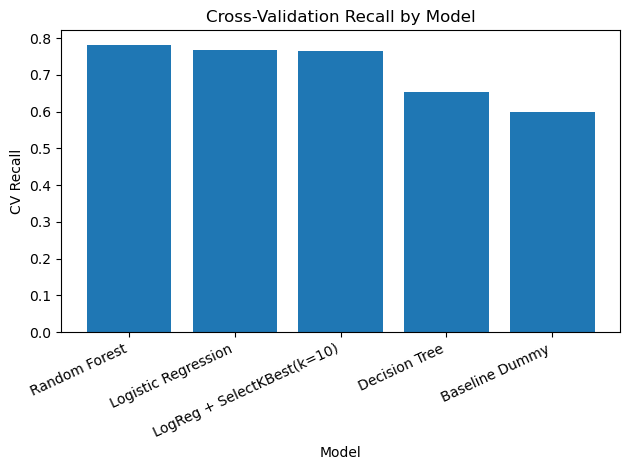

In [12]:
## Evaluate model
PRIMARY_METRIC = "recall"
print("Primary evaluation metric:", PRIMARY_METRIC)



cv_results = cv_compare(models, X_train, y_train)

print("\nCross-Validation Results (sorted by Recall):")
print(cv_results.to_string(index=False))

plt.figure()
plt.bar(cv_results["Model"], cv_results["CV Recall"])
plt.title("Cross-Validation Recall by Model")
plt.xlabel("Model")
plt.ylabel("CV Recall")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()



Models were evaluated using stratified 5-fold cross-validation on the training
dataset. Recall was used as the primary evaluation metric due to the higher cost
associated with false negatives in diabetes risk prediction.

Based on cross-validation Recall, the best-performing model was selected for
final evaluation.



=== Cross-Validation Results (sorted by CV Recall) ===
                     Model  CV Accuracy  CV Precision  CV Recall    CV F1  CV ROC-AUC
             Random Forest     0.740085      0.721547   0.781978 0.750531    0.811368
       Logistic Regression     0.748342      0.738911   0.768151 0.753233    0.825044
LogReg + SelectKBest(k=10)     0.744876      0.736085   0.763553 0.749553    0.820969
             Decision Tree     0.658462      0.660388   0.652579 0.656421    0.658466
            Baseline Dummy     0.499973      0.299991   0.600000 0.399992    0.500000


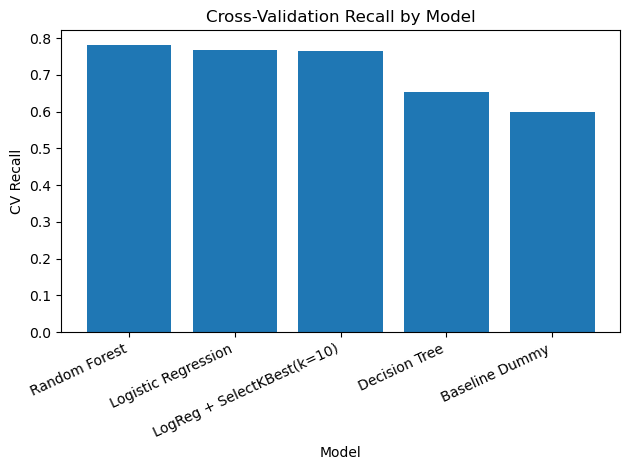

Best model selected: Random Forest

=== TEST RESULTS: Random Forest ===
Accuracy : 0.7358
Precision: 0.7199
Recall   : 0.7721
F1       : 0.7451
ROC-AUC  : 0.8120

Classification Report:
              precision    recall  f1-score   support

           0     0.7543    0.6996    0.7259      7070
           1     0.7199    0.7721    0.7451      7069

    accuracy                         0.7358     14139
   macro avg     0.7371    0.7358    0.7355     14139
weighted avg     0.7371    0.7358    0.7355     14139



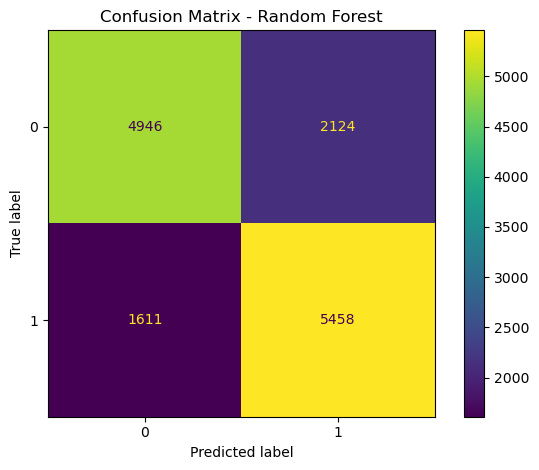

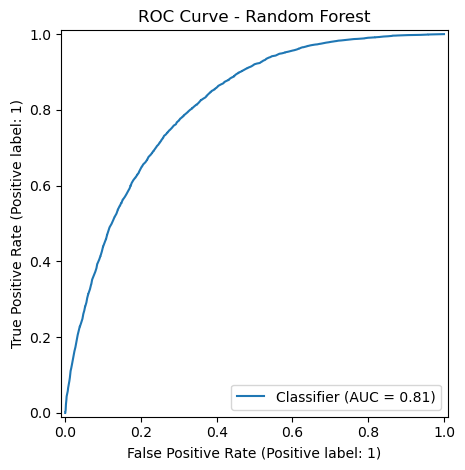

In [13]:
cv_results = cv_compare(models, X_train, y_train)
print("\n=== Cross-Validation Results (sorted by CV Recall) ===")
print(cv_results.to_string(index=False))

# Plot CV Recall comparison
plt.figure()
plt.bar(cv_results["Model"], cv_results["CV Recall"])
plt.title("Cross-Validation Recall by Model")
plt.xlabel("Model")
plt.ylabel("CV Recall")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

# Select best model based on CV Recall
best_model_name = cv_results.iloc[0]["Model"]
best_estimator = models[best_model_name]

print("Best model selected:", best_model_name)

# Evaluate on test set (unseen data)
best_test_metrics = evaluate_on_test(
    best_model_name,
    best_estimator,
    X_train,
    y_train,
    X_test,
    y_test
)


Models were compared using stratified 5-fold cross-validation on the training set
and ranked by Recall, since missing at-risk individuals (false negatives) is the
most costly error. The best model from CV was then evaluated once on an unseen
test set to estimate real-world generalisation performance.


## Iterative model development


Best model selected from CV (Recall): Random Forest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 16}
Best CV Recall after tuning: 0.7955580859336406

=== TEST RESULTS: Tuned Random Forest ===
Accuracy : 0.7498
Precision: 0.7288
Recall   : 0.7957
F1       : 0.7608
ROC-AUC  : 0.8291

Classification Report:
              precision    recall  f1-score   support

           0     0.7751    0.7040    0.7378      7070
           1     0.7288    0.7957    0.7608      7069

    accuracy                         0.7498     14139
   macro avg     0.7520    0.7498    0.7493     14139
weighted avg     0.7520    0.7498    0.7493     14139



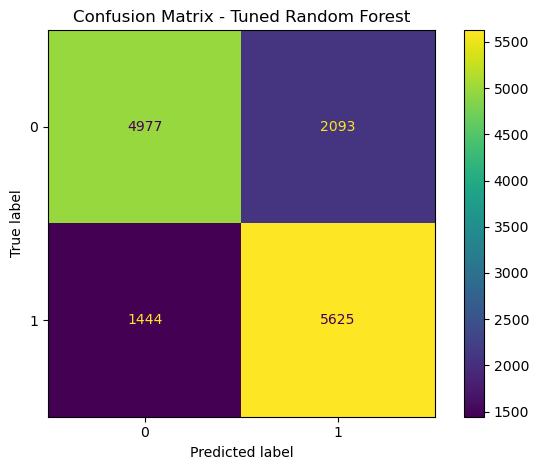

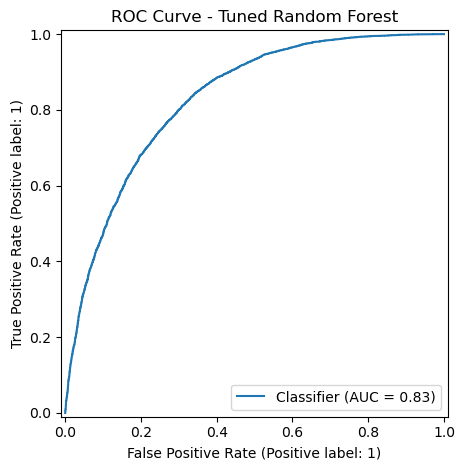

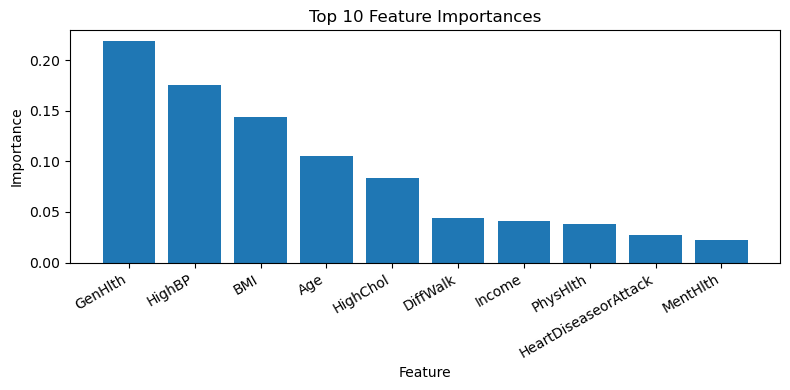


Top 10 important features:
GenHlth                 0.218454
HighBP                  0.175806
BMI                     0.144061
Age                     0.105158
HighChol                0.083965
DiffWalk                0.043553
Income                  0.041362
PhysHlth                0.038248
HeartDiseaseorAttack    0.027090
MentHlth                0.022041
dtype: float64


In [14]:
# -----------------------------
# Iterative improvement: Hyperparameter tuning
# We tune the best-performing model from CV (ranked by Recall)
# -----------------------------

best_model_name = cv_results.iloc[0]["Model"]
print("Best model selected from CV (Recall):", best_model_name)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

if best_model_name == "Random Forest":
    model_to_tune = RandomForestClassifier(random_state=42, n_jobs=-1)

    param_dist = {
        "n_estimators": [200, 400, 600],
        "max_depth": [None, 8, 16],
        "min_samples_split": [2, 10, 30],
        "min_samples_leaf": [1, 5, 15],
    }

    search = RandomizedSearchCV(
        estimator=model_to_tune,
        param_distributions=param_dist,
        n_iter=10,
        scoring=PRIMARY_METRIC,   # Recall
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("Best hyperparameters:", search.best_params_)
    print("Best CV Recall after tuning:", search.best_score_)

    tuned_model = search.best_estimator_

elif best_model_name == "Decision Tree":
    model_to_tune = DecisionTreeClassifier(random_state=42)

    param_dist = {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 10, 30],
        "min_samples_leaf": [1, 5, 15],
    }

    search = RandomizedSearchCV(
        estimator=model_to_tune,
        param_distributions=param_dist,
        n_iter=10,
        scoring=PRIMARY_METRIC,
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("Best hyperparameters:", search.best_params_)
    print("Best CV Recall after tuning:", search.best_score_)

    tuned_model = search.best_estimator_

elif best_model_name == "Logistic Regression":
    model_to_tune = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=3000, random_state=42))
    ])

    # Pipeline params must include the step name "model__"
    param_dist = {
        "model__C": [0.1, 1.0, 10.0],
        "model__penalty": ["l2", "l2", "l2"],  # keep l2 only for stability
        "model__solver": ["lbfgs", "liblinear", "saga"]
    }

    search = RandomizedSearchCV(
        estimator=model_to_tune,
        param_distributions=param_dist,
        n_iter=10,
        scoring=PRIMARY_METRIC,
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("Best hyperparameters:", search.best_params_)
    print("Best CV Recall after tuning:", search.best_score_)

    tuned_model = search.best_estimator_

elif best_model_name == "LogReg + SelectKBest(k=10)":
    model_to_tune = Pipeline([
        ("select", SelectKBest(score_func=mutual_info_classif, k=10)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=3000, random_state=42))
    ])

    param_dist = {
        "select__k": [8, 10, 12],
        "model__C": [0.1, 1.0, 10.0],
        "model__solver": ["lbfgs", "liblinear", "saga"]
    }

    search = RandomizedSearchCV(
        estimator=model_to_tune,
        param_distributions=param_dist,
        n_iter=10,
        scoring=PRIMARY_METRIC,
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("Best hyperparameters:", search.best_params_)
    print("Best CV Recall after tuning:", search.best_score_)

    tuned_model = search.best_estimator_

else:
    # Baseline dummy has no meaningful hyperparameters to tune
    tuned_model = models[best_model_name]
    print("No tuning performed for:", best_model_name)

# Final evaluation after tuning on the test set
tuned_test_metrics = evaluate_on_test(
    f"Tuned {best_model_name}",
    tuned_model,
    X_train,
    y_train,
    X_test,
    y_test
)

if hasattr(tuned_model, "feature_importances_"):
    importances = pd.Series(tuned_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(8, 4))
    plt.bar(importances.head(10).index, importances.head(10).values)
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    print("\nTop 10 important features:")
    print(importances.head(10))
else:
    print("This tuned model does not support feature_importances_.")


The best-performing model was selected based on cross-validation Recall,
which reflects the ability to correctly identify individuals at risk of
diabetes. Recall was prioritised due to the higher cost associated with
false negatives in health screening.

After model selection, hyperparameter tuning was applied only to the selected
model using RandomizedSearchCV. This approach ensures that optimisation efforts
focus on the most suitable algorithm and reduces the risk of overfitting.
The tuned model was then evaluated on an independent test set to assess
its generalisation performance.

Feature selection was implemented using SelectKBest as part of a Pipeline in the
"LogReg + SelectKBest" model variant. This ensures feature selection is performed
within cross-validation and avoids data leakage. Feature selection was tuned
by adjusting the value of k (number of selected features).



In [15]:
# Save final model for Streamlit (safe for Pipeline + non-Pipeline)
final_package = {
    "model": tuned_model,
    "columns": list(X.columns),   # keep full expected input feature list
    "target": TARGET
}

with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(final_package, f)

print("Saved model as diabetes_model.pkl")


Saved model as diabetes_model.pkl
